In [87]:
#common imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Choose your function

Each of the next chuncks of code define a 3D function, plus the parameters for its exploration and visualization. Set the following variable to the correct value to select each function:

In [88]:
#valid values: paraboloid, singularities, polynomial, custom
SELECTED_FUNCTION = 'polynomial'

## Function 1: paraboloid

In [89]:
if SELECTED_FUNCTION == 'paraboloid':
  #the boring paraboloid: y = x₁² + x₂²

  def compute_function(my_x1, my_x2):
    res = np.square(my_x1) + np.square(my_x2)
    return(res)

  def compute_gradient(my_x1, my_x2):
    dx1 = 2*my_x1
    dx2 = 2*my_x2
    return(np.array([dx1, dx2]))

  #GD variables setup
  FUNCTION_NAME = 'y = x₁² + x₂²'

  #starting point
  w = np.array((-80, -60))

  #GD parameters
  LEARNING_RATE = .01
  TOLERANCE = 1e-3
  MAX_STEPS = 1000
  THINNING = 5
  VERBOSE = False

  #Visualization parameters: what part of the 2D space should be
  #sampled for visualization
  X1_sampling = np.linspace(-100, 50, 100)
  X2_sampling = np.linspace(-100, 50, 100)
  #levels in the contour map, can either be a scalar, or a list of values
  LEVELS = 10

## Function 2: singularities

In [90]:
if SELECTED_FUNCTION == 'singularities':
  #Singularities, baby! y = (x1 + x2) / (x1^2 + x2^2)

  def compute_function(my_x1, my_x2):
    res = (my_x1 + my_x2) / (np.square(my_x1) + np.square(my_x2))
    return(res)

  def compute_gradient(my_x1, my_x2):
    den = np.square((np.square(my_x1) + np.square(my_x2)))
    num1 = -np.square(my_x1) - 2 * my_x1 * my_x2 + np.square(my_x2)
    num2 =  np.square(my_x1) - 2 * my_x1 * my_x2 - np.square(my_x2)

    dx1 = num1 / den
    dx2 = num2 / den
    return(np.array([dx1, dx2]))

  #GD variables setup
  FUNCTION_NAME = 'y = (x₁ + x₂) / (x₁² + x₂²)'

  #starting point
  w = np.array((-0.25, 0.2))

  #GD parameters
  LEARNING_RATE = .01
  TOLERANCE = 1e-3
  MAX_STEPS = 1000
  THINNING = 5
  VERBOSE = False

  #Visualization parameters: what part of the 2D space should be
  #sampled for visualization
  X1_sampling = np.linspace(-2, 4, 100)
  X2_sampling = np.linspace(-2, 2, 100)
  #levels in the contour map, can either be a scalar, or a list of values
  LEVELS = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

## Function 3: polynomial

In [91]:
if SELECTED_FUNCTION == 'polynomial':
  #Polynomial goodness: y = x1 + x2 + x1^3 + x2^3 + 0.01*x1^4 + 0.01*x2^4
  def compute_function(my_x1, my_x2):
    res = my_x1 + my_x2 + my_x1 ** 3 + my_x2 ** 3 + 0.01 * my_x1 ** 4 + 0.01 * my_x2 ** 4
    return(res)

  def compute_gradient(my_x1, my_x2):
    dx1 = 1 + 3*my_x1 ** 2 + 0.04 * my_x1 ** 3
    dx2 = 1 + 3*my_x2 ** 2 + 0.04 * my_x2 ** 3
    return(np.array([dx1, dx2]))

  #GD variables setup
  FUNCTION_NAME = 'y = x₁ + x₂ + x₁³ + x₂³ + 0.01*x₁⁴ + 0.01*x₂⁴'

  #starting point
  w = np.array((-20, 20))

  #GD parameters
  LEARNING_RATE = .009
  TOLERANCE = 1e-3
  MAX_STEPS = 1000
  THINNING = 1
  VERBOSE = False

  #Visualization parameters: what part of the 2D space should be
  #sampled for visualization
  X1_sampling = np.linspace(-100, 50, 100)
  X2_sampling = np.linspace(-100, 50, 100)
  #levels in the contour map, can either be a scalar, or a list of values
  LEVELS = 10

## Function 4: custom

In [92]:
if SELECTED_FUNCTION == 'custom':

  def compute_function(my_x1, my_x2):
    #define your function as an algebraic combination of my_x1 and my_x2
    #res = ...
    return(res)

  def compute_gradient(my_x1, my_x2):
    #define the gradient of your function in terms of partial derivatives
    #dx1 = ...
    #dx2 = ...
    return(np.array([dx1, dx2]))


  #You may want to change the following parameters, too

  #GD variables setup
  FUNCTION_NAME = 'A custom function'

  #starting point
  w = np.array((-0.25, 0.2))

  #GD parameters
  LEARNING_RATE = .01
  TOLERANCE = 1e-3
  MAX_STEPS = 1000
  THINNING = 5
  VERBOSE = False

  #Visualization parameters
  #what part of the 2D space should be sampled for visualization
  X1_sampling = np.linspace(-100, 50, 100)
  X2_sampling = np.linspace(-100, 50, 100)
  #levels in the contour map, can either be a scalar or a list of values
  LEVELS = 10

# Perform the Gradient Descent Loop

In [93]:
#taking notes of the trajectory: tested points and quotas
old_w = w.reshape(2,1)
quotas = [compute_function(w[0], w[1])]

iterations = 1
for i in range(MAX_STEPS):
    gradient = compute_gradient(w[0], w[1])
    new_w = w - LEARNING_RATE * gradient
    q = compute_function(new_w[0], new_w[1])

    # Print gradient every ten iterations
    if iterations % THINNING == 0:
        if (VERBOSE):
          print("Iteration: %d - Gradient: (%.6f, %.6f) - New quota %.4f - New position (%.4f, %.4f)" % (iterations, gradient[0], gradient[1], q, w[0], w[1]))
        old_w = np.concatenate((old_w, new_w.reshape(2,1)), axis=1)
        quotas.append(q)

    # Stopping Condition
    if np.sum(abs(new_w - w)) < TOLERANCE:
        print('Gradient Descent has converged')
        break

    iterations += 1
    w = new_w

print('Found solution =', w)

Found solution = [-77.91562167 -77.91562167]


# Plot the function space and the GD trajectory

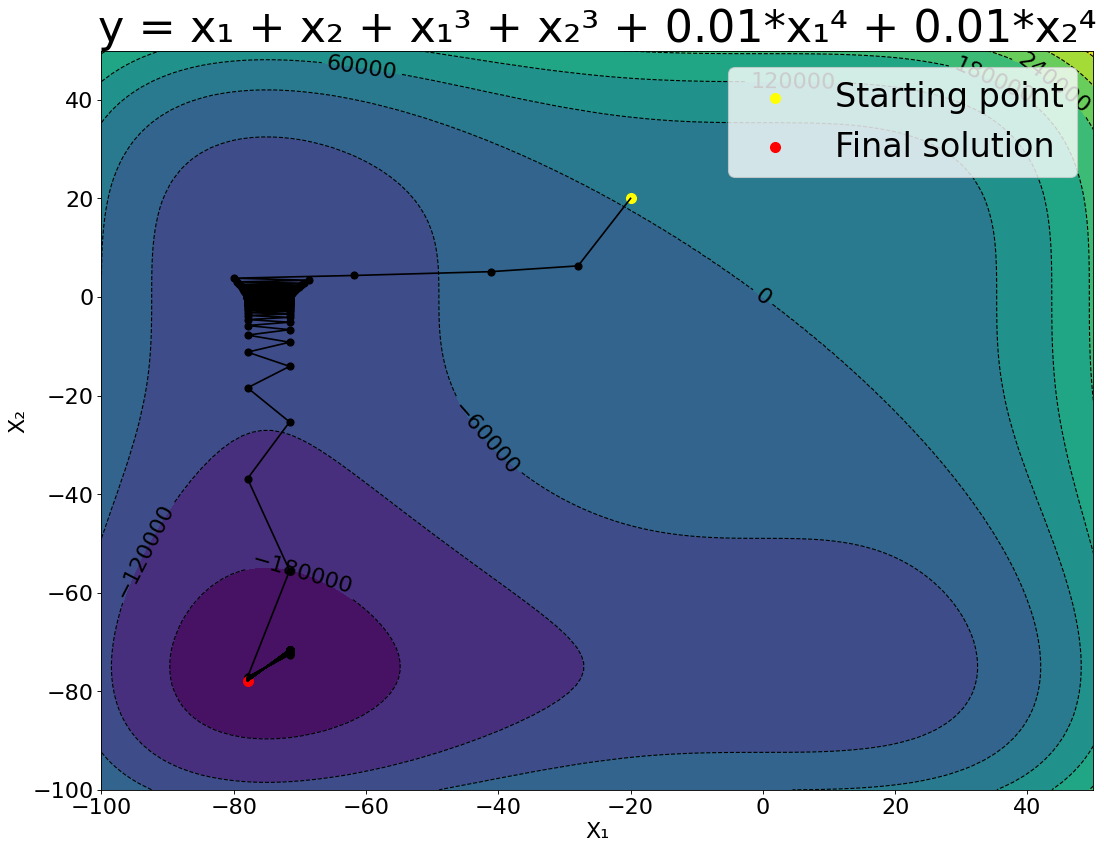

In [94]:
from matplotlib.pyplot import figure
#coordinate set for visualization
X1, X2 = np.meshgrid(X1_sampling, X2_sampling)
Y = compute_function(X1, X2)

figure(figsize=(16, 12), dpi=80)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

cp = plt.contour(X1, X2, Y, colors='black', levels = LEVELS, linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=20)
cp = plt.contourf(X1, X2, Y, levels = LEVELS)
plt.xlabel('X₁', fontsize=20)
plt.ylabel('X₂', fontsize=20)
plt.scatter(old_w[0], old_w[1], 40, color='black')
plt.plot(old_w[0], old_w[1], color='black')
#notable points, bigger
plt.scatter(old_w[0][0], old_w[1][0], 80, color='yellow', label = 'Starting point')
plt.scatter(old_w[0][-1], old_w[1][-1], 80, color='red', label = 'Final solution')
plt.legend(fontsize=30)
plt.title(FUNCTION_NAME, fontsize=40)
plt.show()